# 1. Lineare Gleichungssysteme

Sympy: http://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve 

We import Sympy and initialize nice Latex printing:

In [4]:
from sympy import *
init_printing()

**Übung 1:**
We initialize the symbols and declare the two matrices:

In [12]:
x, y, z = symbols("x, y, z");

A = Matrix([[5, -1, -3], [3, -2, 2], [2, 1, -4]]);
b = Matrix([10, 15, -3]);

We output the two matices:

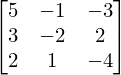

In [10]:
A

Interestingly, B wird horizontal gezeigt wenn es gibt noch eine set von []s. Auf jeden Falls,

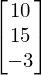

In [13]:
b

Die Definizion eines Lineare Gleichungssysteme:
$$A\vec{x}=\vec{b}$$

In [14]:
linsolve((A,b), [x, y, z])

Let's try to check the first Gleichung.
$$5x-1y-3z=10$$

In [15]:
5*3+1-3*2

**TODO:**
Das alles in Bezug zum Schaltungen.
> Wählen Sie eine Schaltung aus und rechnen dazu die Stromstärken bei angelegter Gleichspannung mit Mathematica aus.

For now, let's try the things that Denysenko did.

In [17]:
i1, i2, i3, i4, i5, i6, ii=symbols("i1, i2, i3, i4, i5, i6, ii");

In [21]:
r1=100; r2=140; r3 = 150; r4 = 80; r5 = 70; u=20;

In [25]:
A = Matrix([[1,-1, 0, 0, 0, 0,-1], 
            [0, 0,-1,-1,-1, 0, 1],
            [0, 0,-1,-1,-1, 0, 1],
            [0, 0,-1, 0, 0,-1, 1],
            [1,-1, 0, 0, 0, 0, -1],
            [0, 0, 0,-r3,r4,0,0],
            [0, 0,-r2,r3, 0,r5, 0],
            [0,-r1,r2,0, 0, 0, 0],
            [0, r1, 0, 0, 0, 0, 0]
           ]);
b = Matrix([0, 0, 0, 0, 0, 0, 0, 0, u]);

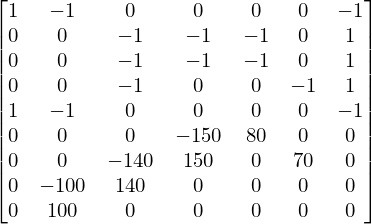

In [69]:
A


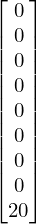

In [70]:
b

In [51]:
r = linsolve((A,b), [ii,i1,i2,i3,i4,i5,i6])

We transform the set into a Matrix, and then transpose it:

(4982/9835, 1/5, 1/7, 16/281, 30/281, 46/281, 603/1967)
[(4982/9835, 1/5, 1/7, 16/281, 30/281, 46/281, 603/1967)]


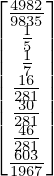

In [73]:
res=[];
for i in r:
    print(i);
    res.append(i);
print(res);
resu=Matrix(res);
resu.T



Let's check! The following should hold:
$$A\vec{r}=b$$

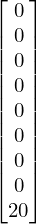

In [74]:
A*resu.T

In [75]:
A*resu.T==b

True